# Data visualisation of suicide rates and social media

1.Loading data from datasources like **kaggle** by using kaggle API 

In [130]:
!kaggle datasets list -s "social media on suicide rates"


ref                                                        title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
aadyasingh55/impact-of-social-media-on-suicide-rates       Impact of social media on suicide rates            811B  2024-10-21 11:10:02           2726         35  1.0              
ankanhore545/world-suicide-rates-20002019                  World_Suicide_Rates_2000-2019                     295KB  2022-01-30 16:25:27           2016         51  0.9411765        
chimavogu/why-are-suicide-rates-so-high-for-men-worldwide  Why are suicide rates so high for men worldwide?    3MB  2022-02-24 06:24:24           1247         11  0.9411765        


2.Downloading dataset and unzip the dataset by using zipfile module

In [131]:
!kaggle datasets download -d "aadyasingh55/impact-of-social-media-on-suicide-rates "

Dataset URL: https://www.kaggle.com/datasets/aadyasingh55/impact-of-social-media-on-suicide-rates 
License(s): Attribution-NonCommercial-ShareAlike 3.0 IGO (CC BY-NC-SA 3.0 IGO)
impact-of-social-media-on-suicide-rates .zip: Skipping, found more recently modified local copy (use --force to force download)


In [132]:
import zipfile as zp

In [133]:
with zp.ZipFile("impact-of-social-media-on-suicide-rates .zip","r") as file:
    file.extractall()

In [134]:
import os
os.listdir()

['.ipynb_checkpoints',
 'impact-of-social-media-on-suicide-rates .zip',
 'social-media-impact-on-suicide-rates.csv',
 'Untitled.ipynb']

In [135]:
import pandas as pd

df=pd.read_csv("social-media-impact-on-suicide-rates.csv")
print(df.head(29))

**Data cleaning and Processing**
a.checking Null values
b.verifying the datatypes and coloumn names

In [136]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     30 non-null     int64  
 1   sex                                      30 non-null     object 
 2   Suicide Rate % change since 2010         30 non-null     float64
 3   Twitter user count % change since 2010   30 non-null     float64
 4   Facebook user count % change since 2010  30 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB
None


creating Visualisations using **MATPLOTLIB** and **SEABORN**

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

**1. Bar Chart: Suicide Rate Change by Gender**

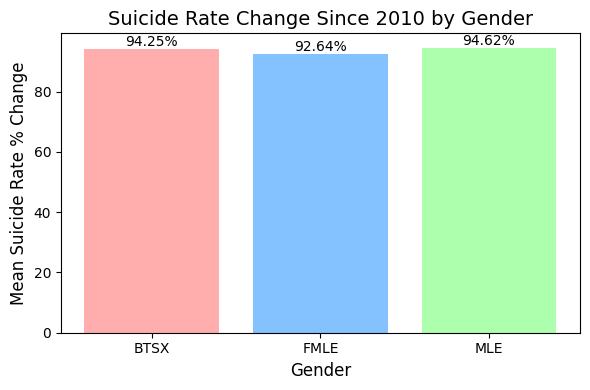

In [138]:
gender_data = df.groupby('sex')['Suicide Rate % change since 2010'].mean()

# bar chart
plt.figure(figsize=(6, 4))
x_labels = gender_data.index  # Gender labels
y_values = gender_data.values  # Mean suicide rate change

# Bar plot
plt.bar(x_labels, y_values, color=['#ff9999', '#66b3ff', '#99ff99'], alpha=0.8)

# Add titles and labels
plt.title("Suicide Rate Change Since 2010 by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Mean Suicide Rate % Change", fontsize=12)

# Display values on bars
for i, value in enumerate(y_values):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

**2. Scatter Plot: Twitter User Growth vs. Facebook User Growth**

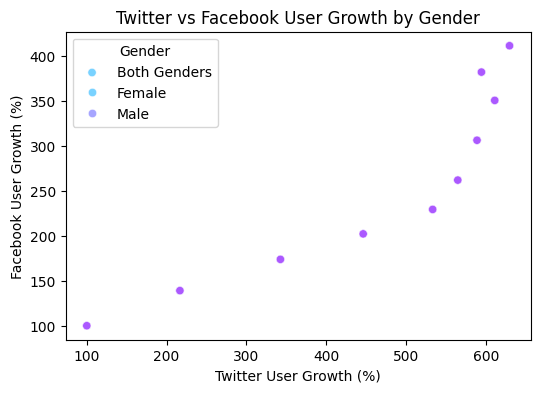

In [139]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='Twitter user count % change since 2010', 
    y='Facebook user count % change since 2010', 
    hue='sex', 
    data=df, 
    palette='cool', 
    alpha=0.7)
plt.title("Twitter vs Facebook User Growth by Gender")
plt.xlabel("Twitter User Growth (%)")
plt.ylabel("Facebook User Growth (%)")
plt.legend(title="Gender", labels=["Both Genders", "Female", "Male"])
plt.show()

**3. Correlation Heatmap**

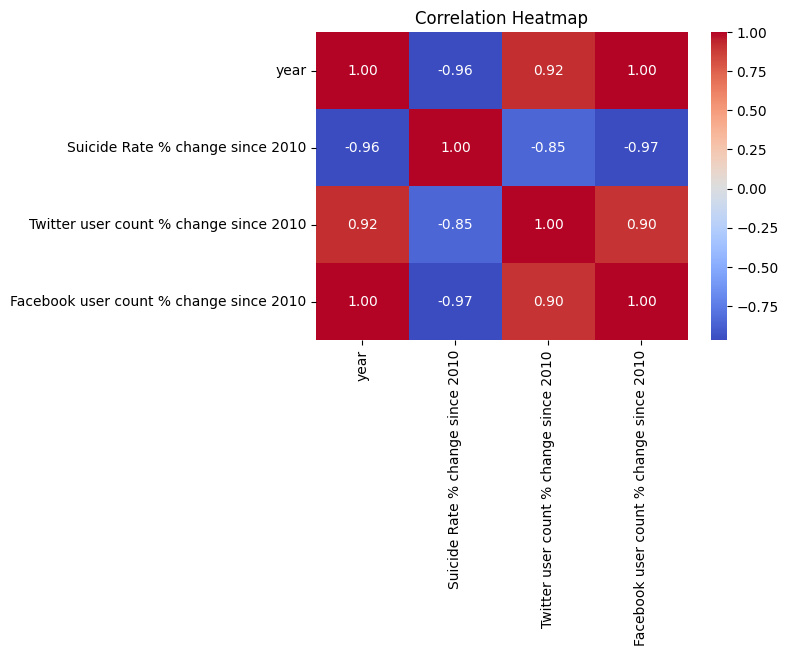

In [140]:
plt.figure(figsize=(6, 4))
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


**4. Histogram: Suicide Rate % Change Distribution**

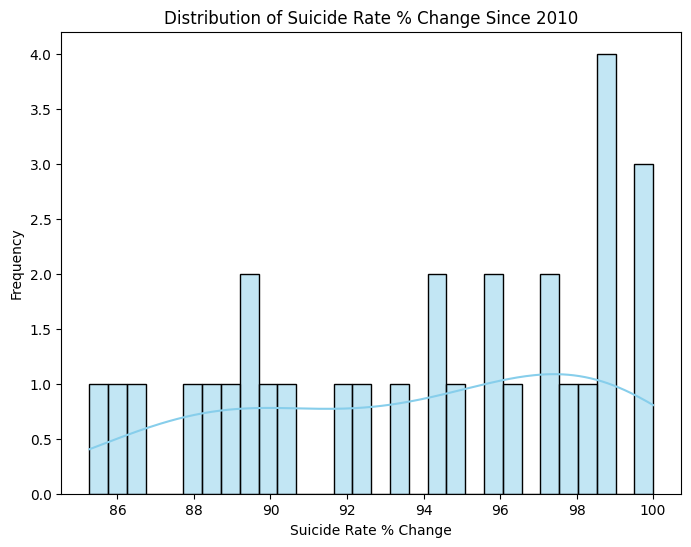

In [141]:
plt.figure(figsize=(8, 6))
sns.histplot(
    df['Suicide Rate % change since 2010'].dropna(), 
    bins=30, 
    kde=True, 
    color='skyblue'
)
plt.title("Distribution of Suicide Rate % Change Since 2010")
plt.xlabel("Suicide Rate % Change")
plt.ylabel("Frequency")
plt.show()

**5. Count Plot: Twitter User Growth by Gender**

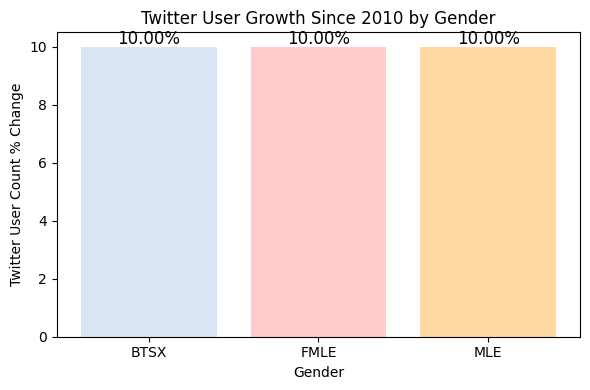

In [142]:
Twitter_growth = df.groupby('sex')['Twitter user count % change since 2010'].count()
plt.figure(figsize=(6,4))
x_lables = Twitter_growth.index
y_values = Twitter_growth.values

plt.bar(x_lables,y_values,color=['#B4CDED','#ff9999','#FFB347'],alpha = 0.5)

plt.title("Twitter User Growth Since 2010 by Gender")
plt.xlabel("Gender")
plt.ylabel("Twitter User Count % Change")

for i,value in enumerate(y_values):
    plt.text(i,value+0.1,f'{value:.2f}%',ha='center',fontsize=12) 
    
plt.tight_layout()
plt.show()

**summary**

In conclusion, the visualisaion analysis shows a decline in suicide rates over the years, with significant growth in Twitter and Facebook usage. While the trends suggest a possible connection between social media and societal changes, further analysis is needed to explore these relationships.